In [9]:
import sys
import os

# Add the repo root to sys.path
# repo_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))  # adjust as needed
# if repo_path not in sys.path:
#     sys.path.insert(0, repo_path)

from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [3]:
!pwd

/Users/ppeaungvongpakdy/Documents/Research/votekit_bt/VoteKit/tests/ballot_generators


In [7]:
%cd ../..

/Users/ppeaungvongpakdy/Documents/Research/votekit_bt/VoteKit


In [10]:
def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [11]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.1, "W2": 0.1}),
                "C": PreferenceInterval({"C1": 0.4, "C2": 0.2}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 1, "C": 0},
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [ ]:
burn_in_time = 10

In [12]:
# run BT both ways and then process the differences
num_ballots = int(10e4)
bals_BT_classic = bt.generate_profile(num_ballots)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)

ballots_per_block={'W': 100000, 'C': 0}


### Visualize the frequency differences between MCMC and classic BT method

False
{'W2C1W1C2': 0.07313, 'W2C1C2W1': 0.04825, 'W2C2W1C1': 0.01822, 'W2C2C1W1': 0.02384, 'W2W1C2C1': 0.0274, 'W2W1C1C2': 0.05467, 'C2C1W1W2': 0.02123, 'C2C1W2W1': 0.02202, 'C2W1W2C1': 0.01219, 'C2W1C1W2': 0.01545, 'C2W2W1C1': 0.0118, 'C2W2C1W1': 0.01603, 'C1C2W1W2': 0.04224, 'C1C2W2W1': 0.04509, 'C1W1W2C2': 0.09935, 'C1W1C2W2': 0.06494, 'C1W2W1C2': 0.09741, 'C1W2C2W1': 0.06291, 'W1C1W2C2': 0.07211, 'W1C1C2W2': 0.0487, 'W1C2W2C1': 0.01743, 'W1C2C1W2': 0.02412, 'W1W2C2C1': 0.02745, 'W1W2C1C2': 0.05402}
['W1', 'W2', 'C1', 'C2']


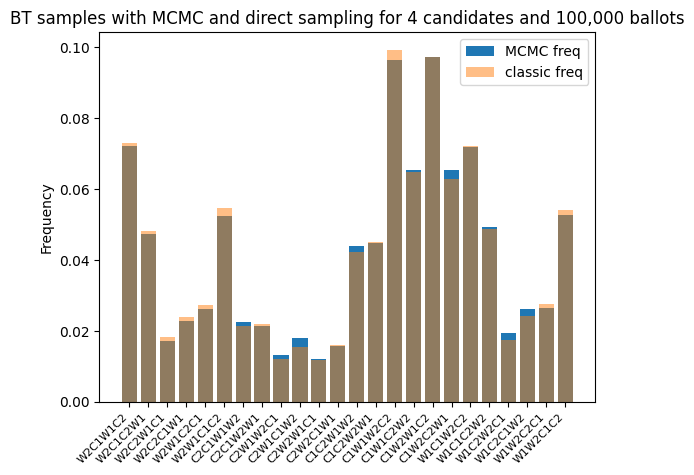

In [13]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]


ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())


plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
#plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")

8
print(cands)


In [14]:
num_ballots_array = np.linspace(100, 2500, 25)
num_ballots_array = num_ballots_array.astype(int)[1:]

In [46]:
num_ballots_array

array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
       2400, 2500])

In [16]:
num_ballots = 10
blah = num_ballots

In [17]:
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_classic = bt.generate_profile(num_ballots)

ballots_per_block={'W': 10, 'C': 0}


In [18]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]


ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

False
{'W1W2C1C2': 0.2, 'W1C1W2C2': 0.1, 'C1W2C2W1': 0.2, 'C1W2W1C2': 0.1, 'C1W1C2W2': 0.2, 'C2W1C1W2': 0.1, 'W2W1C2C1': 0.1}


In [19]:
bals_BT_classic.ballots[0]

Ranking
1.) W1, 
2.) W2, 
3.) C1, 
4.) C2, 
Weight: 2.0

In [38]:
x_labels

['W2W1C2C1',
 'W2W1C1C2',
 'W2C1W1C2',
 'W2C2W1C1',
 'W1C1W2C2',
 'W1W2C1C2',
 'C1C2W1W2',
 'C2W2W1C1']

In [22]:
bal_weights_MCMC

[3, 2, 3, 2]

In [20]:
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/blah for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/blah for i in range(len(ballot_rankings_MCMC))}

In [21]:
bal_rankings_map_classic

{'W1W2C1C2': 0.2,
 'W1C1W2C2': 0.1,
 'C1W2C2W1': 0.2,
 'C1W2W1C2': 0.1,
 'C1W1C2W2': 0.2,
 'C2W1C1W2': 0.1,
 'W2W1C2C1': 0.1}

In [35]:
num_trials = 100

In [31]:
a = [1,2,5]

In [32]:
np.mean(a)

np.float64(2.6666666666666665)

### Looking at the TV distance between observed pdf and MH

In [37]:
tv_distances = []
for num_ballots in tqdm(num_ballots_array):
    running_total = []
    for _ in range(num_trials):
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
        bals_BT_classic = bt.generate_profile(num_ballots)
        
        ## -- Calculate the pdf ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]
        
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}
    
        # populate any missing keys
        for key in bal_rankings_map_classic:
            if key not in bal_rankings_map_MCMC:
                bal_rankings_map_MCMC[key] = 0
        for key in bal_rankings_map_MCMC:
            if key not in bal_rankings_map_classic:
                bal_rankings_map_classic[key] = 0
    
        x_labels = list(bal_rankings_map_classic.keys())
    
        # print(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    
        # plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
        # #plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
        # plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
        # plt.xticks(rotation=45, ha='right', fontsize=8)
        # plt.legend()
        # plt.ylabel("Frequency")
        # plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")
        # plt.show()
        running_total.append(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    ## -- Calculate TV and store ----------- 
    tv_distances.append(np.mean(running_total))

  0%|                                                    | 0/24 [00:00<?, ?it/s]

ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
b

  4%|█▊                                          | 1/24 [00:03<01:11,  3.11s/it]

ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
b

  8%|███▋                                        | 2/24 [00:06<01:13,  3.33s/it]

ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
b

 12%|█████▌                                      | 3/24 [00:10<01:14,  3.56s/it]

ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
b

 17%|███████▎                                    | 4/24 [00:14<01:13,  3.69s/it]

ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
b

 21%|█████████▏                                  | 5/24 [00:18<01:13,  3.89s/it]

ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
b

 25%|███████████                                 | 6/24 [00:23<01:14,  4.15s/it]

ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
b

 29%|████████████▊                               | 7/24 [00:28<01:15,  4.45s/it]

ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
b

 33%|██████████████▋                             | 8/24 [00:33<01:15,  4.72s/it]

ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_bl

 38%|████████████████▌                           | 9/24 [00:39<01:15,  5.00s/it]

ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_

 42%|█████████████████▉                         | 10/24 [00:45<01:14,  5.32s/it]

ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_

 46%|███████████████████▋                       | 11/24 [00:51<01:14,  5.72s/it]

ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_

 50%|█████████████████████▌                     | 12/24 [00:58<01:12,  6.07s/it]

ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_

 54%|███████████████████████▎                   | 13/24 [01:05<01:10,  6.42s/it]

ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_

 58%|█████████████████████████                  | 14/24 [01:13<01:07,  6.76s/it]

ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_

 62%|██████████████████████████▉                | 15/24 [01:21<01:04,  7.17s/it]

ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_

 67%|████████████████████████████▋              | 16/24 [01:29<01:00,  7.52s/it]

ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_

 71%|██████████████████████████████▍            | 17/24 [01:38<00:55,  7.89s/it]

ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_

 75%|████████████████████████████████▎          | 18/24 [01:51<00:56,  9.44s/it]

ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_

 79%|██████████████████████████████████         | 19/24 [02:01<00:48,  9.63s/it]

ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_

 83%|███████████████████████████████████▊       | 20/24 [02:11<00:38,  9.69s/it]

ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_

 88%|█████████████████████████████████████▋     | 21/24 [02:22<00:29,  9.89s/it]

ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_

 92%|███████████████████████████████████████▍   | 22/24 [02:32<00:20, 10.16s/it]

ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_

 96%|█████████████████████████████████████████▏ | 23/24 [02:44<00:10, 10.67s/it]

ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_

100%|███████████████████████████████████████████| 24/24 [02:56<00:00,  7.35s/it]

ballots_per_block={'W': 2500, 'C': 0}


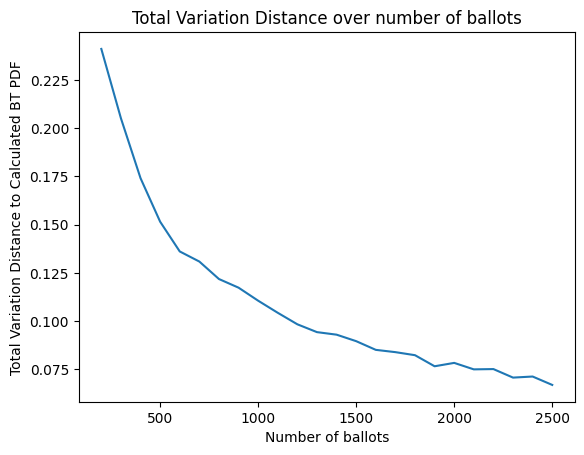

In [38]:
plt.plot(num_ballots_array, tv_distances)
plt.xlabel("Number of ballots")
plt.ylabel("Total Variation Distance to Calculated BT PDF")
plt.title("Total Variation Distance over number of ballots")
plt.show()

### Tweak the voter bloc prop (0.9, 0.1) from (1, 0)

In [40]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.1, "W2": 0.1}),
                "C": PreferenceInterval({"C1": 0.4, "C2": 0.2}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 0.9, "C": 0.1},
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [41]:
tv_distances = []
for num_ballots in tqdm(num_ballots_array):
    running_total = []
    for _ in range(num_trials):
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
        bals_BT_classic = bt.generate_profile(num_ballots)
        
        ## -- Calculate the pdf ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]
        
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}
    
        # populate any missing keys
        for key in bal_rankings_map_classic:
            if key not in bal_rankings_map_MCMC:
                bal_rankings_map_MCMC[key] = 0
        for key in bal_rankings_map_MCMC:
            if key not in bal_rankings_map_classic:
                bal_rankings_map_classic[key] = 0
    
        x_labels = list(bal_rankings_map_classic.keys())
    
        # print(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    
        # plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
        # #plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
        # plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
        # plt.xticks(rotation=45, ha='right', fontsize=8)
        # plt.legend()
        # plt.ylabel("Frequency")
        # plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")
        # plt.show()
        running_total.append(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    ## -- Calculate TV and store ----------- 
    tv_distances.append(np.mean(running_total))

  0%|                                                    | 0/24 [00:00<?, ?it/s]

ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_

  4%|█▊                                          | 1/24 [00:03<01:25,  3.73s/it]

ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 180, 'C': 20}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_

  8%|███▋                                        | 2/24 [00:08<01:29,  4.07s/it]

ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 270, 'C': 30}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_block={'W': 360, 'C': 40}
ballots_per_

 12%|█████▌                                      | 3/24 [00:12<01:28,  4.24s/it]

ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_block={'W': 450, 'C': 50}
ballots_per_

 17%|███████▎                                    | 4/24 [00:17<01:28,  4.42s/it]

ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_block={'W': 540, 'C': 60}
ballots_per_

 21%|█████████▏                                  | 5/24 [00:22<01:30,  4.74s/it]

ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_

 25%|███████████                                 | 6/24 [00:28<01:30,  5.05s/it]

ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 630, 'C': 70}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_

 29%|████████████▊                               | 7/24 [00:33<01:30,  5.29s/it]

ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 720, 'C': 80}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_

 33%|██████████████▋                             | 8/24 [00:40<01:29,  5.58s/it]

ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 810, 'C': 90}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900,

 38%|████████████████▌                           | 9/24 [00:46<01:29,  5.93s/it]

ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 900, 'C': 100}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 9

 42%|█████████████████▉                         | 10/24 [00:53<01:28,  6.30s/it]

ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 990, 'C': 110}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1080, 'C': 120}
bal

 46%|███████████████████▋                       | 11/24 [01:01<01:25,  6.61s/it]

ballots_per_block={'W': 1080, 'C': 120}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}


 50%|█████████████████████▌                     | 12/24 [01:09<01:23,  6.95s/it]

ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1170, 'C': 130}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1260, 'C': 140}


 54%|███████████████████████▎                   | 13/24 [01:16<01:19,  7.24s/it]

ballots_per_block={'W': 1260, 'C': 140}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}
ballots_per_block={'W': 1350, 'C': 150}


 58%|█████████████████████████                  | 14/24 [01:25<01:16,  7.66s/it]

ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}
ballots_per_block={'W': 1440, 'C': 160}


 62%|██████████████████████████▉                | 15/24 [01:34<01:12,  8.03s/it]

ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}
ballots_per_block={'W': 1530, 'C': 170}


 67%|████████████████████████████▋              | 16/24 [01:44<01:08,  8.50s/it]

ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}
ballots_per_block={'W': 1620, 'C': 180}


 71%|██████████████████████████████▍            | 17/24 [01:53<01:02,  8.90s/it]

ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}


 75%|████████████████████████████████▎          | 18/24 [02:03<00:54,  9.13s/it]

ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1710, 'C': 190}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}


 79%|██████████████████████████████████         | 19/24 [02:13<00:47,  9.43s/it]

ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1800, 'C': 200}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1890, 'C': 210}


 83%|███████████████████████████████████▊       | 20/24 [02:24<00:39,  9.78s/it]

ballots_per_block={'W': 1890, 'C': 210}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 1980, 'C': 220}


 88%|█████████████████████████████████████▋     | 21/24 [02:35<00:30, 10.12s/it]

ballots_per_block={'W': 1980, 'C': 220}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2070, 'C': 230}


 92%|███████████████████████████████████████▍   | 22/24 [02:46<00:20, 10.48s/it]

ballots_per_block={'W': 2070, 'C': 230}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2160, 'C': 240}


 96%|█████████████████████████████████████████▏ | 23/24 [02:58<00:10, 10.82s/it]

ballots_per_block={'W': 2160, 'C': 240}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}
ballots_per_block={'W': 2250, 'C': 250}


100%|███████████████████████████████████████████| 24/24 [03:10<00:00,  7.92s/it]

ballots_per_block={'W': 2250, 'C': 250}


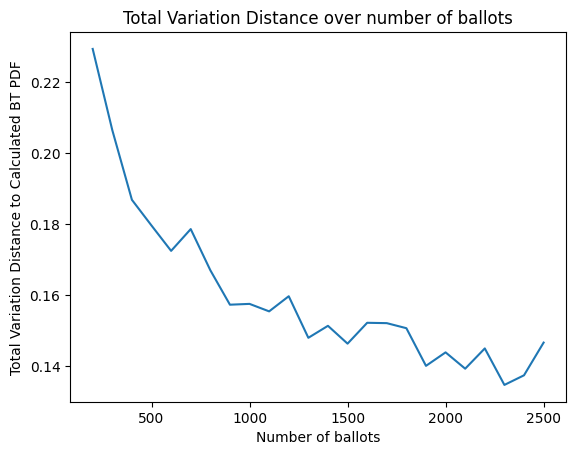

In [42]:
plt.plot(num_ballots_array, tv_distances)
plt.xlabel("Number of ballots")
plt.ylabel("Total Variation Distance to Calculated BT PDF")
plt.title("Total Variation Distance over number of ballots")
plt.show()

### Voter bloc prop (0.5, 0.5)

In [43]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.1, "W2": 0.1}),
                "C": PreferenceInterval({"C1": 0.4, "C2": 0.2}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 0.5, "C": 0.5},
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [44]:
tv_distances = []
for num_ballots in tqdm(num_ballots_array):
    running_total = []
    for _ in range(num_trials):
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
        bals_BT_classic = bt.generate_profile(num_ballots)
        
        ## -- Calculate the pdf ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]
        
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}
    
        # populate any missing keys
        for key in bal_rankings_map_classic:
            if key not in bal_rankings_map_MCMC:
                bal_rankings_map_MCMC[key] = 0
        for key in bal_rankings_map_MCMC:
            if key not in bal_rankings_map_classic:
                bal_rankings_map_classic[key] = 0
    
        x_labels = list(bal_rankings_map_classic.keys())
    
        # print(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    
        # plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
        # #plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
        # plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
        # plt.xticks(rotation=45, ha='right', fontsize=8)
        # plt.legend()
        # plt.ylabel("Frequency")
        # plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")
        # plt.show()
        running_total.append(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    ## -- Calculate TV and store ----------- 
    tv_distances.append(np.mean(running_total))

  0%|                                                    | 0/24 [00:00<?, ?it/s]

ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 1

  4%|█▊                                          | 1/24 [00:03<01:31,  3.98s/it]

ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 100, 'C': 100}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 1

  8%|███▋                                        | 2/24 [00:07<01:27,  4.00s/it]

ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 150, 'C': 150}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 2

 12%|█████▌                                      | 3/24 [00:12<01:28,  4.23s/it]

ballots_per_block={'W': 200, 'C': 200}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 2

 17%|███████▎                                    | 4/24 [00:17<01:30,  4.51s/it]

ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 250, 'C': 250}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 3

 21%|█████████▏                                  | 5/24 [00:22<01:30,  4.77s/it]

ballots_per_block={'W': 300, 'C': 300}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 350, 'C': 350}
ballots_per_block={'W': 3

 25%|███████████                                 | 6/24 [00:28<01:32,  5.17s/it]

ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 4

 29%|████████████▊                               | 7/24 [00:34<01:31,  5.39s/it]

ballots_per_block={'W': 400, 'C': 400}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 4

 33%|██████████████▋                             | 8/24 [00:40<01:29,  5.57s/it]

ballots_per_block={'W': 450, 'C': 450}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 5

 38%|████████████████▌                           | 9/24 [00:46<01:26,  5.79s/it]

ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 500, 'C': 500}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 5

 42%|█████████████████▉                         | 10/24 [00:53<01:24,  6.01s/it]

ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 550, 'C': 550}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 6

 46%|███████████████████▋                       | 11/24 [01:00<01:21,  6.28s/it]

ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 600, 'C': 600}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 6

 50%|█████████████████████▌                     | 12/24 [01:07<01:19,  6.59s/it]

ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 650, 'C': 650}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 7

 54%|███████████████████████▎                   | 13/24 [01:15<01:16,  6.94s/it]

ballots_per_block={'W': 700, 'C': 700}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 7

 58%|█████████████████████████                  | 14/24 [01:22<01:12,  7.22s/it]

ballots_per_block={'W': 750, 'C': 750}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 800, 'C': 800}
ballots_per_block={'W': 8

 62%|██████████████████████████▉                | 15/24 [01:31<01:07,  7.52s/it]

ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 850, 'C': 850}
ballots_per_block={'W': 8

 67%|████████████████████████████▋              | 16/24 [01:39<01:03,  7.88s/it]

ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 900, 'C': 900}
ballots_per_block={'W': 9

 71%|██████████████████████████████▍            | 17/24 [01:48<00:57,  8.23s/it]

ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 950, 'C': 950}
ballots_per_block={'W': 9

 75%|████████████████████████████████▎          | 18/24 [01:58<00:51,  8.63s/it]

ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_bloc

 79%|██████████████████████████████████         | 19/24 [02:08<00:44,  8.93s/it]

ballots_per_block={'W': 1000, 'C': 1000}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_bloc

 83%|███████████████████████████████████▊       | 20/24 [02:18<00:36,  9.25s/it]

ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1050, 'C': 1050}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_block={'W': 1100, 'C': 1100}
ballots_per_bloc

 88%|█████████████████████████████████████▋     | 21/24 [02:28<00:28,  9.61s/it]

ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_block={'W': 1150, 'C': 1150}
ballots_per_bloc

 92%|███████████████████████████████████████▍   | 22/24 [02:39<00:20, 10.09s/it]

ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_bloc

 96%|█████████████████████████████████████████▏ | 23/24 [02:51<00:10, 10.62s/it]

ballots_per_block={'W': 1200, 'C': 1200}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_block={'W': 1250, 'C': 1250}
ballots_per_bloc

100%|███████████████████████████████████████████| 24/24 [03:03<00:00,  7.66s/it]

ballots_per_block={'W': 1250, 'C': 1250}


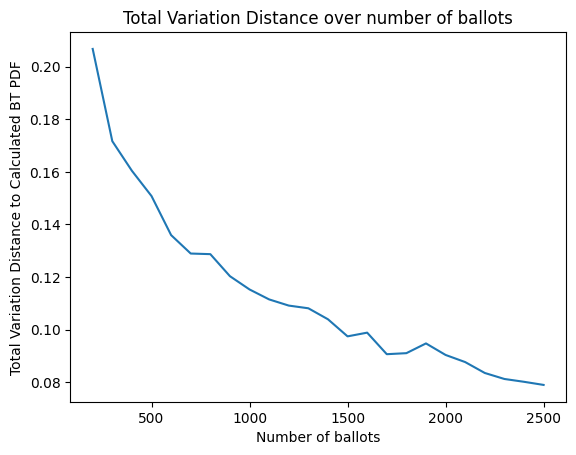

In [45]:
plt.plot(num_ballots_array, tv_distances)
plt.xlabel("Number of ballots")
plt.ylabel("Total Variation Distance to Calculated BT PDF")
plt.title("Total Variation Distance over number of ballots")
plt.show()

### Looking at the changes in voter prop and number of ballots, averaged over num_trials

In [53]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

def tv_distance_over_exp(voter_prop, num_ballots, num_trials):
    """
    Helper function to calculate the total variation (TV) distance across bloc voter prop and number of ballots
    TV is averaged across the number of trials 
    Returns averaged TV distance
    """
    ## -- initialize voters and candidates ----------------
    cands = ["W1", "W2", "C1", "C2"]
    bt = name_BradleyTerry(
        candidates=cands,
            pref_intervals_by_bloc={
                "W": {
                    "W": PreferenceInterval({"W1": 0.1, "W2": 0.1}),
                    "C": PreferenceInterval({"C1": 0.4, "C2": 0.2}),
                },
                "C": {
                    "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                    "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
                },
            },
            bloc_voter_prop={"W": voter_prop, "C": 1-voter_prop},
            cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
        )
    running_total = []
    for _ in range(num_trials):
        ## -- Intialize the ballots ------------ 
        bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
        bals_BT_classic = bt.generate_profile(num_ballots)
        
        ## -- Calculate the pdf ----------------
        ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
        bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
        bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]
        
        
        ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
        bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
        bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
        
        
        bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
        bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}
    
        # populate any missing keys
        for key in bal_rankings_map_classic:
            if key not in bal_rankings_map_MCMC:
                bal_rankings_map_MCMC[key] = 0
        for key in bal_rankings_map_MCMC:
            if key not in bal_rankings_map_classic:
                bal_rankings_map_classic[key] = 0
    
        x_labels = list(bal_rankings_map_classic.keys())
    
        # print(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    
        # plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
        # #plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
        # plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
        # plt.xticks(rotation=45, ha='right', fontsize=8)
        # plt.legend()
        # plt.ylabel("Frequency")
        # plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")
        # plt.show()
        running_total.append(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))
    ## -- Calculate TV ----------- 
    return np.mean(running_total)

In [67]:
## Parameters
num_trials = 100
num_ballots_array = np.linspace(100, 2500, 25)
num_ballots_array = num_ballots_array.astype(int)

voter_prop = np.linspace(1, 0.1, 10)

results = np.empty((len(num_ballots_array), len(voter_prop)))

for i in tqdm(range(len(num_ballots_array))):
    for j in range(len(voter_prop)):
        results[i][j] = tv_distance_over_exp(voter_prop[j], num_ballots_array[i], num_trials)

  0%|                                                    | 0/25 [00:00<?, ?it/s]

ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
ballots_per_block={'W': 100, 'C': 0}
b

  4%|█▊                                          | 1/25 [00:30<12:07, 30.31s/it]

ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 10, 'C': 90}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
ballots_per_block={'W': 200, 'C': 0}
b

  8%|███▌                                        | 2/25 [01:05<12:42, 33.16s/it]

ballots_per_block={'W': 20, 'C': 180}
ballots_per_block={'W': 20, 'C': 180}
ballots_per_block={'W': 20, 'C': 180}
ballots_per_block={'W': 20, 'C': 180}
ballots_per_block={'W': 20, 'C': 180}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C': 0}
ballots_per_block={'W': 300, 'C':

 12%|█████▎                                      | 3/25 [01:43<13:01, 35.51s/it]

ballots_per_block={'W': 30, 'C': 270}
ballots_per_block={'W': 30, 'C': 270}
ballots_per_block={'W': 30, 'C': 270}
ballots_per_block={'W': 30, 'C': 270}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 0}
ballots_per_block={'W': 400, 'C': 

 16%|███████                                     | 4/25 [02:26<13:22, 38.24s/it]

ballots_per_block={'W': 40, 'C': 360}
ballots_per_block={'W': 40, 'C': 360}
ballots_per_block={'W': 40, 'C': 360}
ballots_per_block={'W': 40, 'C': 360}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 0}
ballots_per_block={'W': 500, 'C': 

 20%|████████▊                                   | 5/25 [03:11<13:34, 40.73s/it]

ballots_per_block={'W': 50, 'C': 450}
ballots_per_block={'W': 50, 'C': 450}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}
ballots_per_block={'W': 600, 'C': 0}

 24%|██████████▌                                 | 6/25 [04:00<13:48, 43.59s/it]

ballots_per_block={'W': 60, 'C': 540}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}
ballots_per_block={'W': 700, 'C': 0}


 28%|████████████▎                               | 7/25 [04:52<13:56, 46.50s/it]

ballots_per_block={'W': 70, 'C': 630}
ballots_per_block={'W': 70, 'C': 630}
ballots_per_block={'W': 70, 'C': 630}
ballots_per_block={'W': 70, 'C': 630}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 0}
ballots_per_block={'W': 800, 'C': 

 32%|██████████████                              | 8/25 [05:49<14:04, 49.69s/it]

ballots_per_block={'W': 80, 'C': 720}
ballots_per_block={'W': 80, 'C': 720}
ballots_per_block={'W': 80, 'C': 720}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0}
ballots_per_block={'W': 900, 'C': 0

 36%|███████████████▊                            | 9/25 [06:50<14:12, 53.29s/it]

ballots_per_block={'W': 90, 'C': 810}
ballots_per_block={'W': 90, 'C': 810}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_block={'W': 1000, 'C': 0}
ballots_per_

 40%|█████████████████▏                         | 10/25 [07:52<13:57, 55.86s/it]

ballots_per_block={'W': 100, 'C': 900}
ballots_per_block={'W': 100, 'C': 900}
ballots_per_block={'W': 100, 'C': 900}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_per_block={'W': 1100, 'C': 0}
ballots_p

 44%|██████████████████▉                        | 11/25 [08:58<13:45, 58.98s/it]

ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_block={'W': 1200, 'C': 0}
ballots_per_

 48%|████████████████████▋                      | 12/25 [10:08<13:30, 62.37s/it]

ballots_per_block={'W': 120, 'C': 1080}
ballots_per_block={'W': 120, 'C': 1080}
ballots_per_block={'W': 120, 'C': 1080}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballots_per_block={'W': 1300, 'C': 0}
ballot

 52%|██████████████████████▎                    | 13/25 [11:21<13:06, 65.54s/it]

ballots_per_block={'W': 130, 'C': 1170}
ballots_per_block={'W': 130, 'C': 1170}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_per_block={'W': 1400, 'C': 0}
ballots_

 56%|████████████████████████                   | 14/25 [12:37<12:35, 68.65s/it]

ballots_per_block={'W': 140, 'C': 1260}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_per_block={'W': 1500, 'C': 0}
ballots_pe

 60%|█████████████████████████▊                 | 15/25 [13:56<11:57, 71.77s/it]

ballots_per_block={'W': 150, 'C': 1350}
ballots_per_block={'W': 150, 'C': 1350}
ballots_per_block={'W': 150, 'C': 1350}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballots_per_block={'W': 1600, 'C': 0}
ballot

 64%|███████████████████████████▌               | 16/25 [15:22<11:24, 76.05s/it]

ballots_per_block={'W': 160, 'C': 1440}
ballots_per_block={'W': 160, 'C': 1440}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_per_block={'W': 1700, 'C': 0}
ballots_

 68%|█████████████████████████████▏             | 17/25 [16:49<10:35, 79.41s/it]

ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_block={'W': 1800, 'C': 0}
ballots_per_

 72%|██████████████████████████████▉            | 18/25 [18:20<09:39, 82.84s/it]

ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_block={'W': 1900, 'C': 0}
ballots_per_

 76%|████████████████████████████████▋          | 19/25 [19:53<08:36, 86.10s/it]

ballots_per_block={'W': 190, 'C': 1710}
ballots_per_block={'W': 190, 'C': 1710}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_per_block={'W': 2000, 'C': 0}
ballots_

 80%|██████████████████████████████████▍        | 20/25 [21:31<07:28, 89.65s/it]

ballots_per_block={'W': 200, 'C': 1800}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_per_block={'W': 2100, 'C': 0}
ballots_pe

 84%|████████████████████████████████████       | 21/25 [23:13<06:12, 93.14s/it]

ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_block={'W': 2200, 'C': 0}
ballots_per_

 88%|█████████████████████████████████████▊     | 22/25 [25:01<04:52, 97.63s/it]

ballots_per_block={'W': 220, 'C': 1980}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_per_block={'W': 2300, 'C': 0}
ballots_pe

 92%|██████████████████████████████████████▋   | 23/25 [26:51<03:22, 101.39s/it]

ballots_per_block={'W': 230, 'C': 2070}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_per_block={'W': 2400, 'C': 0}
ballots_pe

 96%|████████████████████████████████████████▎ | 24/25 [28:43<01:44, 104.64s/it]

ballots_per_block={'W': 240, 'C': 2160}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_per_block={'W': 2500, 'C': 0}
ballots_pe

100%|███████████████████████████████████████████| 25/25 [30:46<00:00, 73.86s/it]

ballots_per_block={'W': 250, 'C': 2250}
ballots_per_block={'W': 250, 'C': 2250}


In [58]:
voter_prop

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

In [63]:
len(num_ballots_array)

25

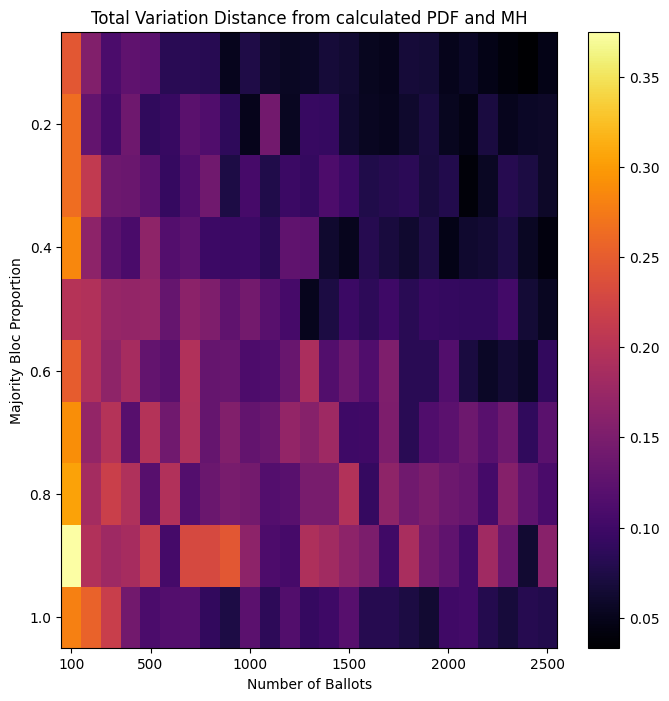

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(results.T, origin="lower", cmap="inferno", aspect='auto')  # stretch to fill
plt.title("Total Variation Distance from calculated PDF and MH")

# What are the contour lines actually doing here? Are they partitioning where the values cross?
# Contour
# contours = ax.contour(results.T, levels=[0.8], colors='white', linewidths=2, origin='lower')
# ax.clabel(contours, inline=True, fontsize=10, fmt='%.1f')

num_ballots_array = np.linspace(100, 2500, 25)
num_ballots_array = num_ballots_array.astype(int)

voter_prop = np.linspace(1, 0.1, 10)

ax.set_yticks([0, 2, 4, 6, 8])
ax.set_yticklabels(np.round(voter_prop[[0, 2, 4, 6, 8]], 2))
ax.set_xticks([0, 4, 9, 14, 19, 24])
ax.set_xticklabels(num_ballots_array[[0, 4, 9, 14, 19, 24]])

ax.set_ylabel("Majority Bloc Proportion")
ax.set_xlabel("Number of Ballots")
plt.colorbar()
plt.show()

In [61]:
len(num_ballot_array)

NameError: name 'num_ballot_array' is not defined

In [ ]:
total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels)

In [ ]:
abs(bal_rankings_map_MCMC['W1W2C1C2'] - bal_rankings_map_classic['W1W2C1C2'])

In [ ]:
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
8


In [ ]:
bals_BT_MCMC.ballots